In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [ ]:
health_df1 = pd.read_csv('/content/drive/MyDrive/Data_Mining_Project/diabetes_012_health_indicators_BRFSS2015.csv')
health_df2 = pd.read_csv('/content/drive/MyDrive/Data_Mining_Project/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
health_df3 = pd.read_csv('/content/drive/MyDrive/Data_Mining_Project/diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
print("df1: ",health_df1.shape)
print("df2: ",health_df2.shape)
print("df3: ",health_df3.shape)

df1:  (253680, 22)
df2:  (70692, 22)
df3:  (253680, 22)


In [ ]:
health_df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
health_df2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
health_df3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
health_df1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
health_df2.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
health_df3.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
health_df1.rename(columns={'Diabetes_012':'Diabetes_binary'},inplace = True)

In [ ]:
health_df1['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

<Axes: xlabel='Diabetes_binary'>

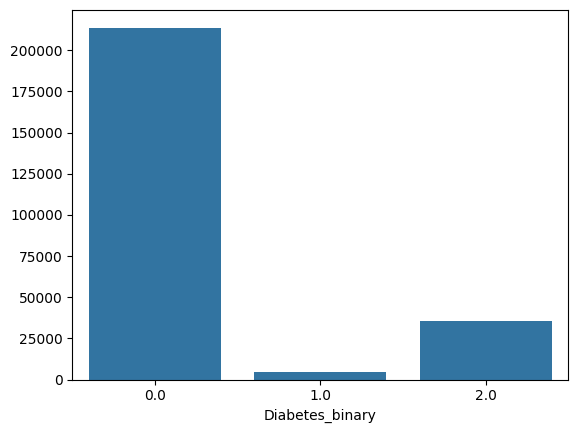

In [ ]:
sns.barplot(x=health_df1['Diabetes_binary'].value_counts().index,y=health_df1['Diabetes_binary'].value_counts().values)

In [ ]:
frames = [health_df1,health_df2,health_df3]
df = pd.concat(frames)

In [ ]:
df.shape

(578052, 22)

In [ ]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578052 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       578052 non-null  float64
 1   HighBP                578052 non-null  float64
 2   HighChol              578052 non-null  float64
 3   CholCheck             578052 non-null  float64
 4   BMI                   578052 non-null  float64
 5   Smoker                578052 non-null  float64
 6   Stroke                578052 non-null  float64
 7   HeartDiseaseorAttack  578052 non-null  float64
 8   PhysActivity          578052 non-null  float64
 9   Fruits                578052 non-null  float64
 10  Veggies               578052 non-null  float64
 11  HvyAlcoholConsump     578052 non-null  float64
 12  AnyHealthcare         578052 non-null  float64
 13  NoDocbcCost           578052 non-null  float64
 14  GenHlth               578052 non-null  float64
 15  MentH

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,...,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000
mean,0.252598,0.445444,0.436544,0.964209,28.562700,0.447095,0.043212,0.100744,0.750000,0.631509,...,0.951530,0.085368,2.551222,3.254145,4.433878,0.178558,0.442379,8.099617,5.034599,6.010392
std,0.557751,0.497015,0.495957,0.185769,6.689993,0.497194,0.203335,0.300989,0.433013,0.482396,...,0.214757,0.279428,1.079378,7.509915,8.908079,0.382982,0.496669,3.035618,0.992077,2.087400
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.750000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.nunique()

Diabetes_binary          3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [ ]:
print("BMI:\n" , df['BMI'].unique())
print("Mental Health:\n" , df['MentHlth'].unique())
print("Physical Health:\n" , df['PhysHlth'].unique())
print("Age:\n" , df['Age'].unique())
print("Education:\n" , df['Education'].unique())
print("Income:\n" , df['Income'].unique())

BMI:
 [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Mental Health:
 [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
Physical Health:
 [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
Age:
 [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]
Education:
 [4. 6. 3. 5. 2. 1.]
Income:
 [3. 1. 8. 6. 4. 7. 2. 5.]


In [ ]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    467383
1.0     75323
2.0     35346
Name: count, dtype: int64

In [ ]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
for column in (df.columns):
  df[column] = df[column].astype(int)

In [ ]:
df.drop_duplicates(inplace = True)

<Axes: xlabel='Diabetes_binary'>

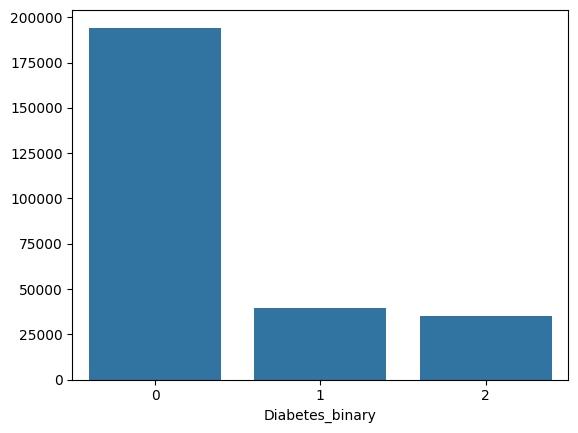

In [ ]:
sns.barplot(x=df['Diabetes_binary'].value_counts().index,y=df['Diabetes_binary'].value_counts().values)

In [ ]:
df['Diabetes_binary'] = df['Diabetes_binary'].map({2: 1, 1: 1, 0: 0})

In [ ]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0    194377
1     74754
Name: count, dtype: int64

<Axes: xlabel='Diabetes_binary'>

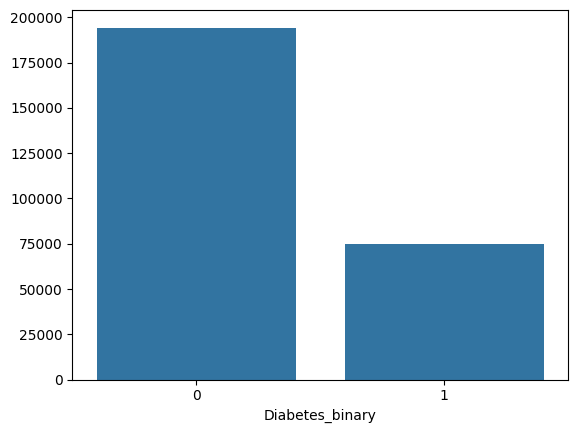

In [ ]:
sns.barplot(x=df['Diabetes_binary'].value_counts().index,y=df['Diabetes_binary'].value_counts().values)

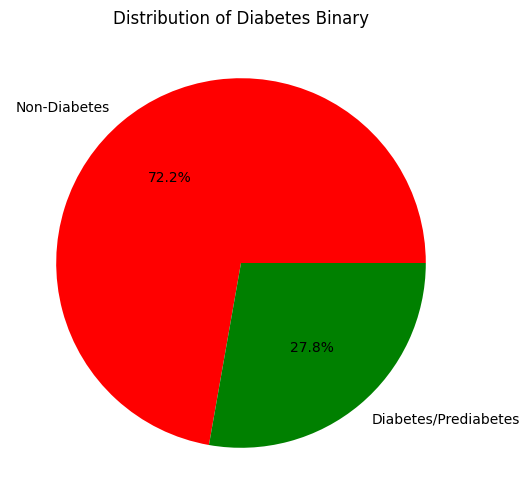

In [ ]:
df['Diabetes_binary_label'] = df['Diabetes_binary'].map({0: 'Non-Diabetes', 1: 'Diabetes/Prediabetes'})

plt.figure(figsize=(6, 6))
df['Diabetes_binary_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Distribution of Diabetes Binary')
plt.ylabel('')
plt.show()
df.drop('Diabetes_binary_label', axis=1, inplace=True)

<ipython-input-32-d0bff166c966>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Age', data=df[df['Diabetes_binary']==1],palette='husl')
<ipython-input-32-d0bff166c966>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 90)


[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

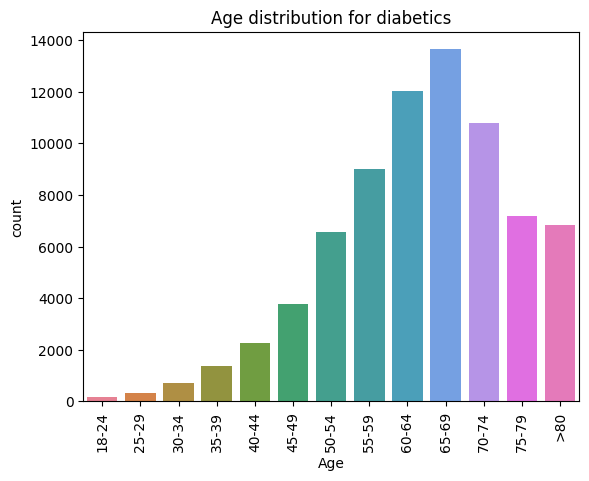

In [ ]:
# Age Distribution for diabetes and pre diabetes
ax = sns.countplot(x='Age', data=df[df['Diabetes_binary']==1],palette='husl')
ax.set(title= 'Age distribution for diabetics')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 90)

<ipython-input-30-e8620a555804>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df[df['Diabetes_binary']==0], x='Sex', ax=ax1, palette='husl')
<ipython-input-30-e8620a555804>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Female', 'Male'])
<ipython-input-30-e8620a555804>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=df[df['Diabetes_binary']==1], x='Sex', ax=ax2, palette='husl')
<ipython-input-30-e8620a555804>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Female', 'Male'])


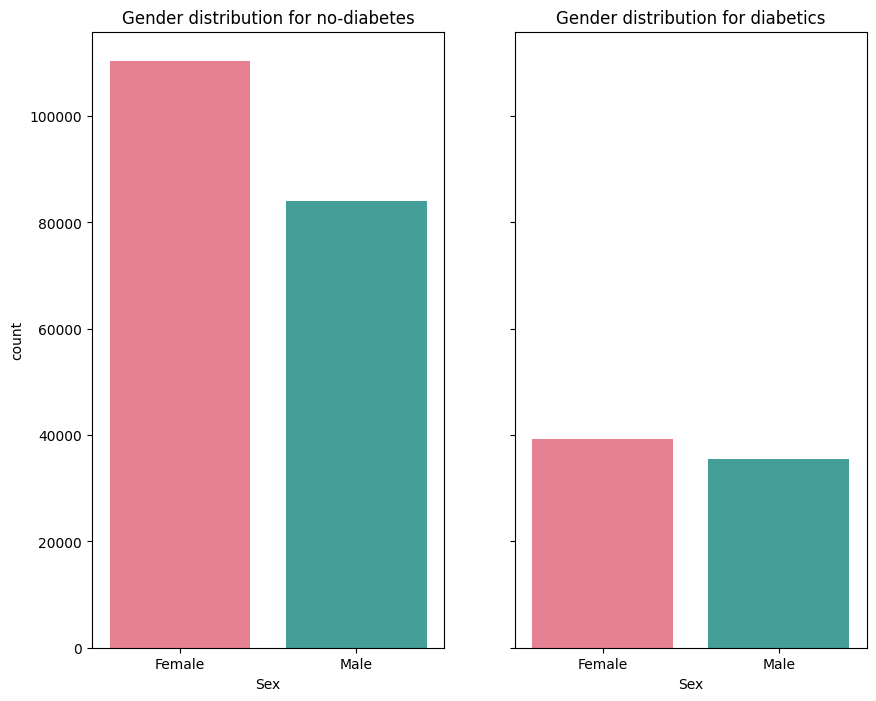

In [ ]:
# Gender Distribution
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,8))
ax1 = sns.countplot(data=df[df['Diabetes_binary']==0], x='Sex', ax=ax1, palette='husl')
ax1.set(title='Gender distribution for no-diabetes')
ax1.set_xticklabels(['Female', 'Male'])

ax2 = sns.countplot(data=df[df['Diabetes_binary']==1], x='Sex', ax=ax2, palette='husl')
ax2.set(title='Gender distribution for diabetics')
ax2.set_xticklabels(['Female', 'Male'])
plt.show()

<ipython-input-31-3efa5f51ef6a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Paired')
<ipython-input-31-3efa5f51ef6a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No diabetes', 'Diabetic'])


[Text(0, 0, 'No diabetes'), Text(1, 0, 'Diabetic')]

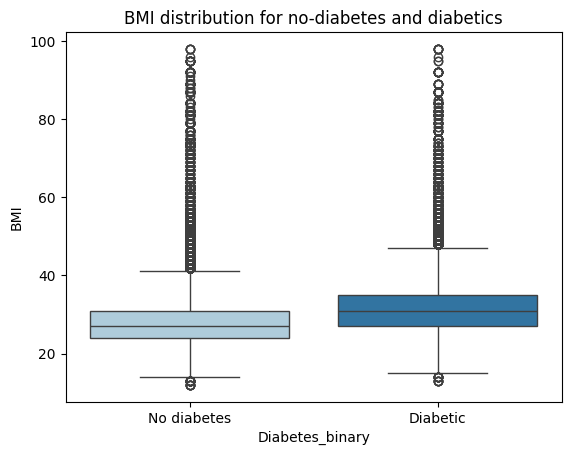

In [ ]:
# Compare BMI for people with and without diabetes
ax = sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Paired')
ax.set(title = 'BMI distribution for no-diabetes and diabetics')
ax.set_xticklabels(['No diabetes', 'Diabetic'])
#plt.ylim(15, 60)

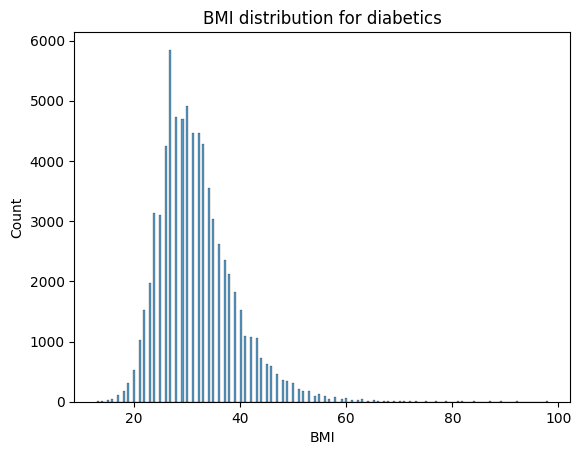

In [ ]:
df_filtered = df[df['Diabetes_binary'] == 1]
ax = sns.histplot(data=df_filtered, x='BMI')
ax.set(title='BMI distribution for diabetics')
plt.show()

<ipython-input-33-b7642a11e953>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
<ipython-input-33-b7642a11e953>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
<ipython-input-33-b7642a11e953>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
<ipython-input-33-b7642a11e953>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
<ipython-input-33-b7642a11e953>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
<ipython-input-33-b7642a11e953>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])


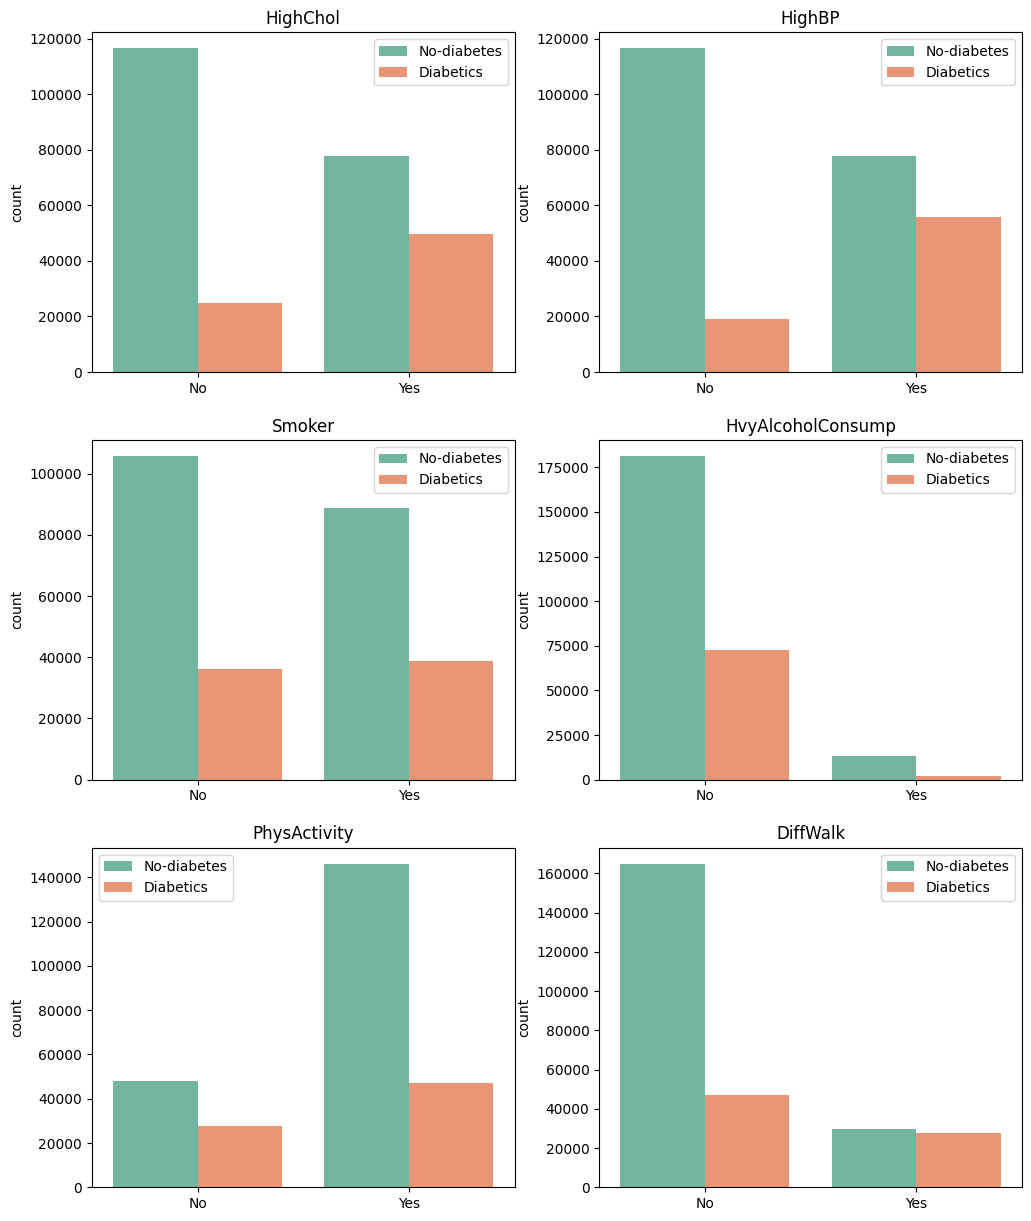

In [ ]:
col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']
a=1
fig = plt.figure(figsize=(12,15))
for i in col_names:
    plt.subplot(3,2,a)
    ax = sns.countplot(data=df, x=i, hue='Diabetes_binary', palette='Set2')
    ax.set(title = '{}'.format(i))
    ax.set(xlabel=None)
    ax.set_xticklabels(['No', 'Yes'])
    ax.legend(['No-diabetes', 'Diabetics'])
    a = a + 1

In [ ]:
#df['Diabetes_binary'] = df['Diabetes_binary'].map({2:1, 1:1, 0:0})

In [ ]:
df.shape

(269131, 22)

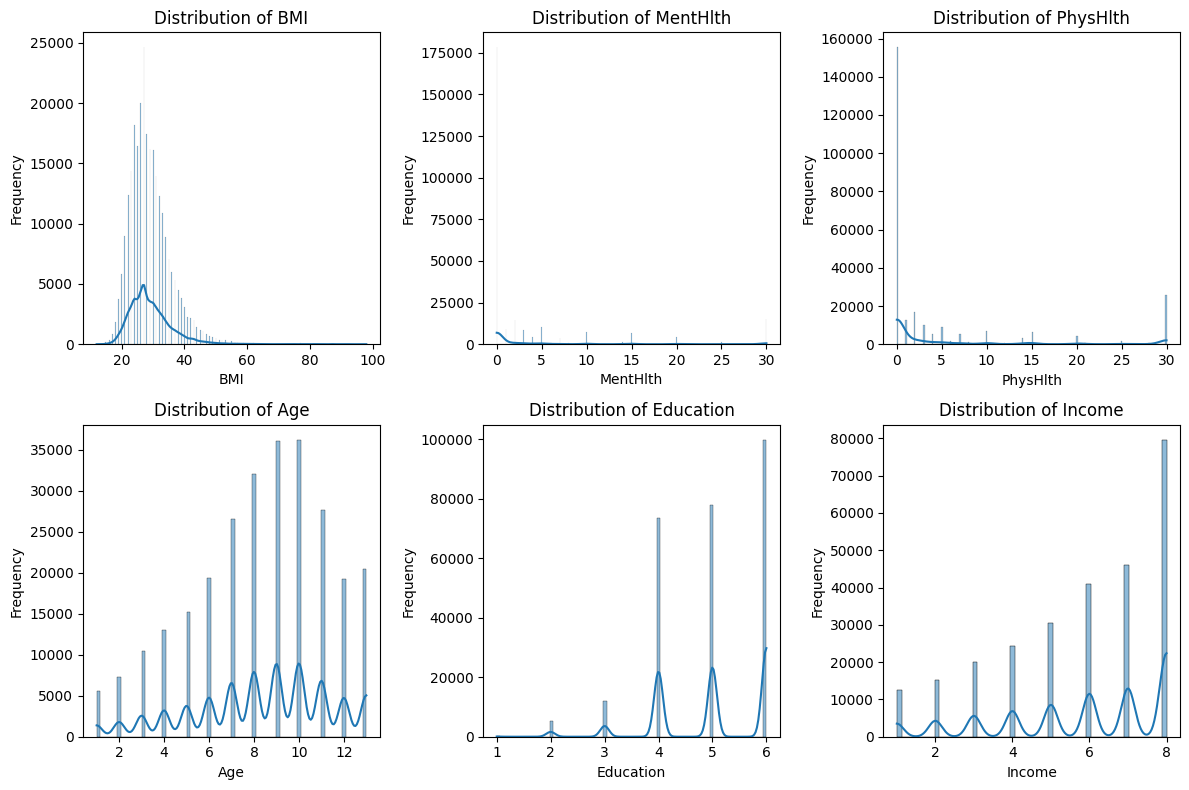

In [ ]:
numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = df.corr()

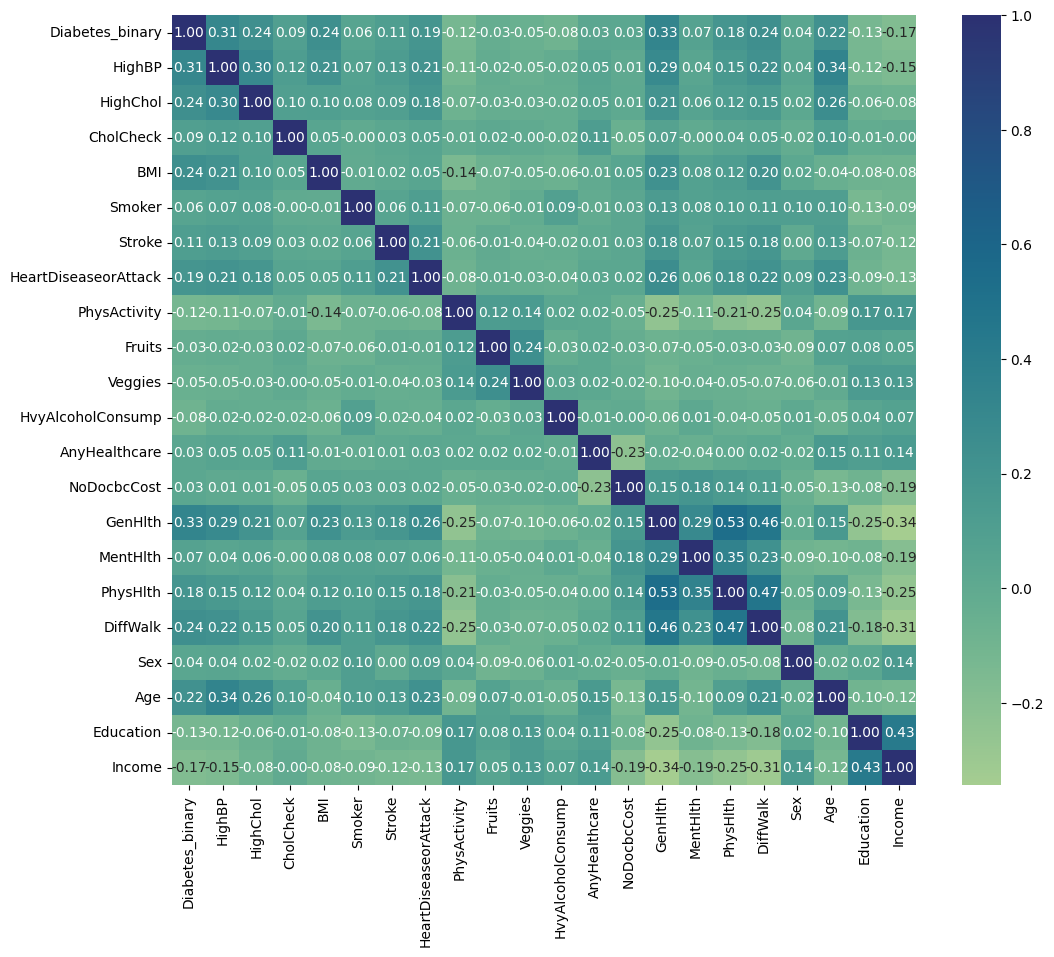

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=corr_matrix, cmap='crest', annot=True, fmt=".2f")
plt.show()

In [ ]:
print('Average BMI for diabetics is {} and no-diabetes is {} '.format((df[df['Diabetes_binary'] == 1]['BMI']).mean(),(df[df['Diabetes_binary'] == 0]['BMI']).mean()))

Average BMI for diabetics is 31.890721566738904 and no-diabetes is 28.095854962264053 


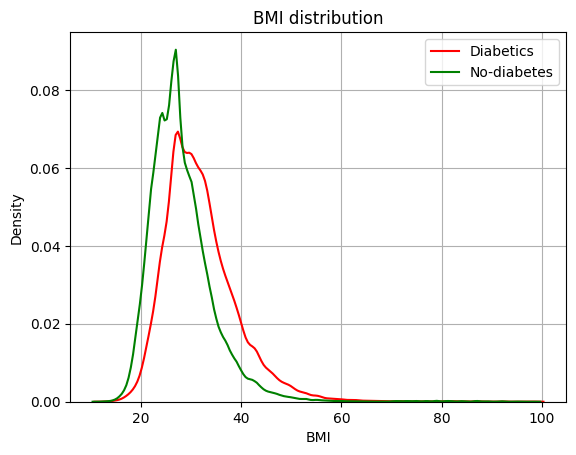

In [ ]:
# BMI distribution
sns.kdeplot((df[df['Diabetes_binary'] == 1]['BMI']),color='red')
sns.kdeplot((df[df['Diabetes_binary'] == 0]['BMI']),color='green')
plt.grid()
plt.title('BMI distribution')
plt.legend(['Diabetics', 'No-diabetes'])

In [ ]:
contingency= pd.crosstab(df.Diabetes_binary, df.HighChol)
contingency

HighChol,0,1
Diabetes_binary,,
0,116528,77849
1,24933,49821


Text(0.5, 1.0, 'High cholesterol proportion across diabetics and no-diabetes')

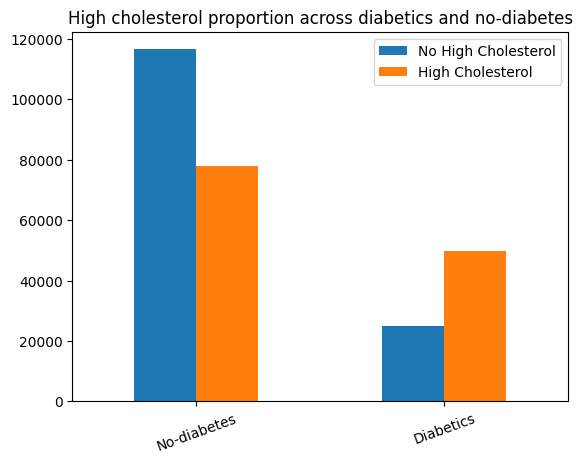

In [ ]:
# Visualize high cholesterol proportions
ax = contingency.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)
ax.legend(['No High Cholesterol', 'High Cholesterol'])
plt.title('High cholesterol proportion across diabetics and no-diabetes')

In [ ]:
x = df.drop('Diabetes_binary', axis = 1)
y = df['Diabetes_binary']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Logistic Regression

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracy_scores = {}
best_selected_features = None
best_accuracy = 0

for num in range(1, 21):
    kbest_selector = SelectKBest(score_func=chi2, k=num)
    X_train_selected = kbest_selector.fit_transform(X_train, y_train)
    selected_indices = kbest_selector.get_support(indices=True)
    selected_features = x.columns[selected_indices]
    model = LogisticRegression()
    model.fit(X_train_selected, y_train)
    X_test_selected = X_test.iloc[:, selected_indices]
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[num] = accuracy

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_selected_features = selected_features

for k, accuracy in accuracy_scores.items():
    print(f"Accuracy with {k} selected features: {accuracy}")
best_k = max(accuracy_scores, key=accuracy_scores.get)
print(f"Best value of k: {best_k} with accuracy: {best_accuracy}")
print("Selected features for best accuracy:", best_selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warning

Accuracy with 1 selected features: 0.7232801382205956
Accuracy with 2 selected features: 0.7324576885206309
Accuracy with 3 selected features: 0.7322719081501848
Accuracy with 4 selected features: 0.7387370650417077
Accuracy with 5 selected features: 0.7456666728593457
Accuracy with 6 selected features: 0.7569806974195107
Accuracy with 7 selected features: 0.7575008824567596
Accuracy with 8 selected features: 0.7583554721608115
Accuracy with 9 selected features: 0.7616809407917959
Accuracy with 10 selected features: 0.7620710795697326
Accuracy with 11 selected features: 0.7621453917179111
Accuracy with 12 selected features: 0.7630557155330968
Accuracy with 13 selected features: 0.7625541085328924
Accuracy with 14 selected features: 0.7621082356438219
Accuracy with 15 selected features: 0.7629999814219629
Accuracy with 16 selected features: 0.76266557675516
Accuracy with 17 selected features: 0.762386906199491
Accuracy with 18 selected features: 0.7634830103851227
Accuracy with 19 selec

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification report\n",classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report
               precision    recall  f1-score   support

           0       0.80      0.90      0.84     38932
           1       0.60      0.40      0.48     14895

    accuracy                           0.76     53827
   macro avg       0.70      0.65      0.66     53827
weighted avg       0.74      0.76      0.74     53827



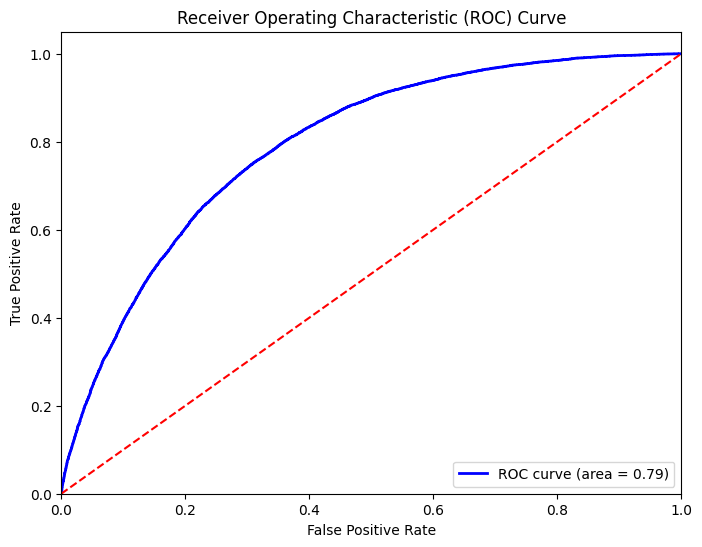

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Parameter Tuning for logistic regression

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

kbest_selector = SelectKBest(score_func=chi2, k=18)
X_train_selected = kbest_selector.fit_transform(X_train, y_train)
selected_indices = kbest_selector.get_support(indices=True)
best_selected_features = x.columns[selected_indices]

model = LogisticRegression()
model.fit(X_train_selected, y_train)
print("Before Hyper Paramter tuning:\n",classification_report(y_test, y_pred))
# Hyperparameter tuning
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

logistic_grid = GridSearchCV(estimator=model, param_grid=param_grid_logistic, cv=5)
logistic_grid.fit(X_train_selected, y_train)

print("\nBest Parameters for Logistic Regression (after tuning):", logistic_grid.best_params_)

X_test_selected = X_test.iloc[:, selected_indices]
y_pred = logistic_grid.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)
print("After Hyper Paramter tuning:\n",classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Before Hyper Paramter tuning:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85     38932
           1       0.61      0.38      0.47     14895

    accuracy                           0.76     53827
   macro avg       0.70      0.64      0.66     53827
weighted avg       0.74      0.76      0.74     53827



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 


Best Parameters for Logistic Regression (after tuning): {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on test set: 0.7624240622735802
After Hyper Paramter tuning:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85     38932
           1       0.61      0.38      0.47     14895

    accuracy                           0.76     53827
   macro avg       0.70      0.65      0.66     53827
weighted avg       0.74      0.76      0.74     53827



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

num_features_range = range(1, 21)
accuracy_scores = {}

for k in num_features_range:

    model_rf = RandomForestClassifier()
    model_rf.fit(X_train, y_train)
    top_features = model_rf.feature_importances_.argsort()[-k:][::-1]
    X_train_selected = X_train.iloc[:, top_features]
    scores = cross_val_score(model_rf, X_train_selected, y_train, cv=5)
    accuracy = scores.mean()
    accuracy_scores[k] = accuracy

for k, accuracy in accuracy_scores.items():
    print(f"Accuracy with {k} selected features: {accuracy}")

best_k = max(accuracy_scores, key=accuracy_scores.get)
print(f"Best value of k: {best_k} with accuracy: {accuracy_scores[best_k]}")

best_features = model_rf.feature_importances_.argsort()[-best_k:][::-1]
X_train_best = X_train.iloc[:, best_features]
model_rf.fit(X_train_best, y_train)

X_test_selected = X_test.iloc[:, best_features]
y_pred = model_rf.predict(X_test_selected)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set with {best_k} selected features: {accuracy_test}")

Accuracy with 1 selected features: 0.7254347362769152
Accuracy with 2 selected features: 0.7407479693768331
Accuracy with 3 selected features: 0.741128824658628
Accuracy with 4 selected features: 0.7444682875855919
Accuracy with 5 selected features: 0.7623360426286032
Accuracy with 6 selected features: 0.7755034625967745
Accuracy with 7 selected features: 0.7902825597660187
Accuracy with 8 selected features: 0.799543893559308
Accuracy with 9 selected features: 0.8070774415188435
Accuracy with 10 selected features: 0.8141093487389371
Accuracy with 11 selected features: 0.8233381667391919
Accuracy with 12 selected features: 0.8267937388381508
Accuracy with 13 selected features: 0.8359575321555581
Accuracy with 14 selected features: 0.8388464598654822
Accuracy with 15 selected features: 0.8423809980274799
Accuracy with 16 selected features: 0.8430405340039065
Accuracy with 17 selected features: 0.8443596032601889
Accuracy with 18 selected features: 0.8452699378180425
Accuracy with 19 sele

In [ ]:
#best_features_indices = model_rf.feature_importances_.argsort()[-20:][::-1]
#X_train_best = X_train.iloc[:, best_features_indices]
#X_test_best = X_test.iloc[:, best_features_indices]

model_rf_best = RandomForestClassifier()
model_rf_best.fit(X_train, y_train)

y_pred_best = model_rf_best.predict(X_test)

classification_rep = classification_report(y_test, y_pred_best)

print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     38932
           1       0.76      0.79      0.77     14895

    accuracy                           0.87     53827
   macro avg       0.84      0.85      0.84     53827
weighted avg       0.87      0.87      0.87     53827



In [ ]:
model_rf_best.__dict__

{'estimator': DecisionTreeClassifier(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'base_estimator': 'deprecated',
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Ed

Hyper Paramter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)
classification_rep = classification_report(y_test, y_pred_best)

print("Classification Report:")
print(classification_rep)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     38932
           1       0.74      0.64      0.68     14895

    accuracy                           0.84     53827
   macro avg       0.80      0.77      0.79     53827
weighted avg       0.83      0.84      0.83     53827



In [ ]:
x = df.drop('Diabetes_binary', axis = 1)
y = df['Diabetes_binary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
hpm = {'max_depth':range(10,21), 'min_samples_leaf': [1], 'min_samples_split': [2], 'n_estimators': range(100,500,100)}

rf_2 = RandomForestClassifier()
grid_search = GridSearchCV(rf_2, hpm, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_rf_2 = RandomForestClassifier(**best_params)
best_rf_2.fit(X_train, y_train)
y_pred_best = best_rf_2.predict(X_test)
classification_rep = classification_report(y_test, y_pred_best)

print("Classification Report:")
print(classification_rep)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     38932
           1       0.74      0.64      0.68     14895

    accuracy                           0.84     53827
   macro avg       0.80      0.78      0.79     53827
weighted avg       0.83      0.84      0.83     53827



Gradient boosting Classifier

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb_classifier = GradientBoostingClassifier()

gb_classifier.fit(X_train, y_train)
y_pred_before_tuning = gb_classifier.predict(X_test)
classification_rep_before = classification_report(y_test, y_pred_before_tuning)
print("Classification Report Before Tuning:")
print(classification_rep_before)

feature_importances = gb_classifier.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]

top_features_indices = sorted_indices[:15]
X_train_top = X_train.iloc[:, top_features_indices]
X_test_top = X_test.iloc[:, top_features_indices]

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_top, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_gb_classifier = GradientBoostingClassifier(**best_params)
best_gb_classifier.fit(X_train_top, y_train)
y_pred_after_tuning = best_gb_classifier.predict(X_test_top)

classification_rep_after = classification_report(y_test, y_pred_after_tuning)
print("Classification Report After Tuning:")
print(classification_rep_after)

Classification Report Before Tuning:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     38932
           1       0.63      0.43      0.51     14895

    accuracy                           0.77     53827
   macro avg       0.72      0.67      0.68     53827
weighted avg       0.76      0.77      0.76     53827

Best Parameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}
Classification Report After Tuning:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86     38932
           1       0.64      0.50      0.56     14895

    accuracy                           0.78     53827
   macro avg       0.73      0.69      0.71     53827
weighted avg       0.77      0.78      0.77     53827



In [ ]:
gb_classifier.__dict__

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': None,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'feature_names_in_': array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
        'Income'], dtype=object),
 'n_features_in_': 21,
 'classes_': array([0, 1]),
 '_n_classes': 2,
 'n_classes_': 2,
 '_loss': <sklearn.ensemble._gb_losses.BinomialDeviance at 0x77fd85f82aa0>,
 'max_features_': 21,
 'i

Paramter tuning for gradient boosting classifier

In [ ]:
hpm = {'learning_rate': [0.1], 'max_depth': range(10), 'n_estimators': [200]}

gb_classifier_hpm = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gb_classifier_hpm, param_grid=hpm, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_gb_classifier = GradientBoostingClassifier(**best_params)
best_gb_classifier.fit(X_train_top, y_train)
y_pred_after_tuning = best_gb_classifier.predict(X_test_top)
classification_rep_after = classification_report(y_test, y_pred_after_tuning)
print("Classification Report After Tuning:")
print(classification_rep_after)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
Classification Report After Tuning:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     38932
           1       0.65      0.50      0.57     14895

    accuracy                           0.79     53827
   macro avg       0.74      0.70      0.71     53827
weighted avg       0.78      0.79      0.78     53827



KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83     38932
           1       0.56      0.51      0.53     14895

    accuracy                           0.75     53827
   macro avg       0.69      0.68      0.68     53827
weighted avg       0.75      0.75      0.75     53827



In [ ]:
knn_classifier.__dict__

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform',
 'feature_names_in_': array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
        'Income'], dtype=object),
 'n_features_in_': 21,
 'outputs_2d_': False,
 'classes_': array([0, 1]),
 '_y': array([1, 0, 0, ..., 0, 0, 0]),
 'effective_metric_params_': {},
 'effective_metric_': 'euclidean',
 '_fit_method': 'brute',
 '_fit_X': array([[ 1,  1,  1, ..., 12,  5,  3],
        [ 0,  0,  1, ...,  7,  6,  7],
        [ 0,  1,  1, ...,  2,  5,  4],
        ...,
        [ 0,  1,  1, ...,  9,  5,  7],
        [ 0,  1,  1, ..., 10,  5,  2],
        [ 0,  0,  1, ..., 11,  5,  8]]),
 'n_samples_fit_': 215304

MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

model_mlp = MLPClassifier()
model_mlp.fit(X_train, y_train)

predictions_before = model_mlp.predict(X_test)
accuracy_before = accuracy_score(y_test, predictions_before)
classification_report_before = classification_report(y_test, predictions_before)

print("Before Parameter Tuning:")
print("Accuracy Score:", accuracy_before)
print("Classification Report:")
print(classification_report_before)

Before Parameter Tuning:
Accuracy Score: 0.7699110112025563
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     38932
           1       0.63      0.41      0.49     14895

    accuracy                           0.77     53827
   macro avg       0.72      0.66      0.67     53827
weighted avg       0.75      0.77      0.75     53827



Parameter Tuning

In [ ]:
param_grid = {
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

model_mlp_grid = GridSearchCV(MLPClassifier(), param_grid, cv=5, scoring='accuracy')
model_mlp_grid.fit(X_train, y_train)

best_params_mlp = model_mlp_grid.best_params_
print("\nBest Parameters:", best_params_mlp)

best_model_mlp = MLPClassifier(**best_params_mlp)
best_model_mlp.fit(X_train, y_train)
predictions_after = best_model_mlp.predict(X_test)

classification_report_after = classification_report(y_test, predictions_after)

print("\nAfter Parameter Tuning:")
print("Classification Report:")
print(classification_report_after)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Best Parameters: {'alpha': 0.01, 'learning_rate': 'adaptive', 'solver': 'adam'}

After Parameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     38932
           1       0.61      0.46      0.53     14895

    accuracy                           0.77     53827
   macro avg       0.71      0.68      0.69     53827
weighted avg       0.76      0.77      0.76     53827



In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
  pickle.dump(clf, f)